<a href="https://colab.research.google.com/github/McManjitha/Image-Processing-Assignment-2/blob/main/Assignment_2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from skimage import io
import numpy as np
from scipy.ndimage import gaussian_filter
import cv2
import matplotlib.pyplot as plt

(-0.5, 1279.5, 719.5, -0.5)

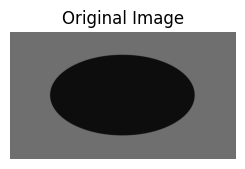

In [20]:
image = cv2.imread('image2.png')
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

In [21]:
image.shape

(720, 1280, 3)

In [22]:
import numpy as np

def region_growing(image, points, threshold):

  #Performs region growing segmentation on an image.

  #Args:
      #image: A 2D numpy array representing the image.
      #seeds: A list of tuples (x, y) representing the seed points.
      #threshold: The threshold for considering a neighboring pixel similar to the seed.

  new_array = np.zeros((image.shape[0], image.shape[1]))

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      new_array[i, j] = image[i, j, 0]



  # Initialize segmentation mask
  segmentation = np.zeros_like(new_array, dtype=bool)
  rows, cols = new_array.shape

  # Process each seed point
  for point in points:
    seed_row, seed_col = point
    if not (0 <= seed_row < rows and 0 <= seed_col < cols):
      continue

    # Queue for breadth-first search
    queue = [(seed_row, seed_col)]
    visited = set()

    while queue:
      row, col = queue.pop(0)
      if (row, col) in visited:
        continue
      visited.add((row, col))
      segmentation[row, col] = True

      # Check neighboring pixels
      for drow, dcol in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        new_row, new_col = row + drow, col + dcol
        if not (0 <= new_row < rows and 0 <= new_col < cols):
          continue
        if segmentation[new_row, new_col]:
          continue
        if abs(new_array[row, col] - new_array[new_row, new_col]) <= threshold:
          queue.append((new_row, new_col))

  return segmentation

points = [(353, 644), (362, 623), (355, 620), (340, 680), (400, 620)]
threshold = 4

segmentation = region_growing(image, points, threshold)

print(segmentation)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [23]:
foreground = np.zeros((image.shape[0], image.shape[1], 3))

for i in range(segmentation.shape[0]):
  for j in range(segmentation.shape[1]):
    if(segmentation[i, j] == True):
        foreground[i,j] = [0,0,0]
    else:
        foreground[i,j] = [255,255,255]



(-0.5, 1279.5, 719.5, -0.5)

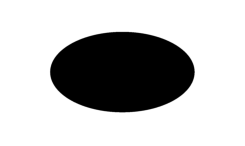

In [24]:
plt.subplot(1, 2, 1)
plt.imshow(foreground, cmap='gray')
plt.axis('off')